In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path, listdir
%matplotlib inline
from pandas import ExcelWriter
from pandas import ExcelFile
from dateutil.parser import parse
sns.set_style('white')

### Data cleaning and preprocessing

In [6]:
df = pd.read_excel('Instacart_Data Science Challenge.xlsx', sheetname='Raw Data (disguised)')
df.head()

c:\users\prajakta gujarathi\appdata\local\programs\python\python36\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,order delivery time,order id,customer order rating,type of issue reported,region
0,2014-06-02 04:23:16 UTC,233599337,5,NaN,chi
1,2014-06-02 03:57:50 UTC,233599376,5,NaN,chi
2,2014-06-02 02:52:38 UTC,233599328,5,NaN,chi
3,2014-06-02 02:52:04 UTC,233599070,5,NaN,chi
4,2014-06-02 02:41:43 UTC,233599100,5,NaN,chi


####  Converting order delivery utc time to regional timezone

In [7]:
from pytz import timezone

df["order delivery time"] = df["order delivery time"].apply(lambda x : parse(x))
print(df.head())
def convert_timezone(row):
   
    if row["region"].strip() == "chi":
        row["order delivery time"] = row["order delivery time"].astimezone(timezone('US/Central'))
    if row["region"].strip() == "sf":
        row["order delivery time"] = row["order delivery time"].astimezone(timezone('US/Pacific'))
    if row["region"].strip() == "nyc":
        row["order delivery time"] = row["order delivery time"].astimezone(timezone('US/Eastern'))  
    return row    
df = df.apply(lambda x : convert_timezone(x),axis=1)
df.head()

        order delivery time   order id  customer order rating  \
0 2014-06-02 04:23:16+00:00  233599337                      5   
1 2014-06-02 03:57:50+00:00  233599376                      5   
2 2014-06-02 02:52:38+00:00  233599328                      5   
3 2014-06-02 02:52:04+00:00  233599070                      5   
4 2014-06-02 02:41:43+00:00  233599100                      5   

  type of issue reported region  
0                    NaN    chi  
1                    NaN    chi  
2                    NaN    chi  
3                    NaN    chi  
4                    NaN    chi  


,order delivery time,order id,customer order rating,type of issue reported,region
0,2014-06-01 23:23:16-05:00,233599337,5,NaN,chi
1,2014-06-01 22:57:50-05:00,233599376,5,NaN,chi
2,2014-06-01 21:52:38-05:00,233599328,5,NaN,chi
3,2014-06-01 21:52:04-05:00,233599070,5,NaN,chi
4,2014-06-01 21:41:43-05:00,233599100,5,NaN,chi


In [109]:
df.fillna("None",inplace=True)

In [8]:
print(df.describe())
print("--------INFO and NULL---------")
print(df.info())

           order id  customer order rating
count  1.495700e+04           14957.000000
mean   1.041118e+08               4.558200
std    1.159783e+08               1.002157
min    2.080560e+05               0.000000
25%    2.329820e+05               5.000000
50%    2.458290e+05               5.000000
75%    2.335890e+08               5.000000
max    2.336147e+08               5.000000
--------INFO and NULL---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14957 entries, 0 to 14956
Data columns (total 5 columns):
order delivery time       14957 non-null object
order id                  14957 non-null int64
customer order rating     14957 non-null int64
type of issue reported    1087 non-null object
region                    14957 non-null object
dtypes: int64(2), object(3)
memory usage: 584.3+ KB
None


In [9]:
## check for duplicate order id
df["order id"].nunique()

13845

In [10]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,order delivery time,order id,customer order rating,type of issue reported,region
49,2014-06-01 19:18:47-05:00,233598909,5,Wrong item,chi
1035,2014-05-27 15:33:42-05:00,233589496,5,Damaged or spoiled,chi
2016,2014-05-20 22:34:31-05:00,233581307,5,Damaged or spoiled,chi
4706,2014-05-05 10:48:17-05:00,226767,5,Item charged incorrectly,chi
5491,2014-05-29 11:02:05-05:00,233593252,4,Wrong item,chi
5578,2014-05-24 18:41:24-05:00,233586437,4,Damaged or spoiled,chi
5599,2014-05-23 15:24:50-05:00,233584871,4,Damaged or spoiled,chi
5600,2014-05-23 15:24:50-05:00,233584871,4,Damaged or spoiled,chi
5638,2014-05-20 18:17:55-05:00,233580924,4,Item missing,chi
5873,2014-05-09 14:32:23-05:00,232985,4,Damaged or spoiled,chi


In [11]:
duplicateRowsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 49 to 14113
Data columns (total 5 columns):
order delivery time       123 non-null object
order id                  123 non-null int64
customer order rating     123 non-null int64
type of issue reported    123 non-null object
region                    123 non-null object
dtypes: int64(2), object(3)
memory usage: 5.8+ KB


### Assuming duplicate rows are due to error in data collection technique. So I am going to ignore duplicate for further analysis

In [12]:
df = df.drop_duplicates()
print(df.describe())
print("--------INFO and NULL---------")
print(df.info())


           order id  customer order rating
count  1.483400e+04           14834.000000
mean   1.041394e+08               4.573412
std    1.159814e+08               0.985520
min    2.080560e+05               0.000000
25%    2.329862e+05               5.000000
50%    2.458290e+05               5.000000
75%    2.335890e+08               5.000000
max    2.336147e+08               5.000000
--------INFO and NULL---------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14834 entries, 0 to 14956
Data columns (total 5 columns):
order delivery time       14834 non-null object
order id                  14834 non-null int64
customer order rating     14834 non-null int64
type of issue reported    964 non-null object
region                    14834 non-null object
dtypes: int64(2), object(3)
memory usage: 695.3+ KB
None


In [13]:
df['order delivery date'] = [d.date() for d in df['order delivery time']]
df['order delivery time'] = [d.time() for d in df['order delivery time']]
df["day_week"] = pd.DatetimeIndex(df["order delivery date"]).dayofweek
df["year"] = pd.DatetimeIndex(df["order delivery date"]).year
df["month"] = pd.DatetimeIndex(df["order delivery date"]).month
df["day"] = pd.DatetimeIndex(df["order delivery date"]).day
df["quarter"] = pd.DatetimeIndex(df["order delivery date"]).quarter
#train["year_month"] = train['new_date'].map(lambda x: 1000*x.year + x.month)
df["hour"] = df["order delivery time"].apply(lambda x : x.hour)


In [14]:

df.head()

,order delivery time,order id,customer order rating,type of issue reported,region,order delivery date,day_week,year,month,day,quarter,hour
0,23:23:16,233599337,5,NaN,chi,2014-06-01,6,2014,6,1,2,23
1,22:57:50,233599376,5,NaN,chi,2014-06-01,6,2014,6,1,2,22
2,21:52:38,233599328,5,NaN,chi,2014-06-01,6,2014,6,1,2,21
3,21:52:04,233599070,5,NaN,chi,2014-06-01,6,2014,6,1,2,21
4,21:41:43,233599100,5,NaN,chi,2014-06-01,6,2014,6,1,2,21


## Univarient Analysis

#### User behavioral pattern: explore temportality effect(timeofday,dayofweek,mixed effect)

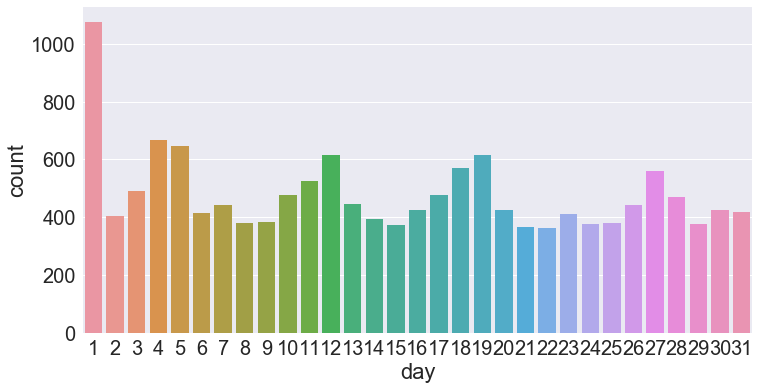

In [15]:
sns.set(font_scale=2)
plt.figure(figsize=(12, 6))
sns.countplot(x="day",data=df)

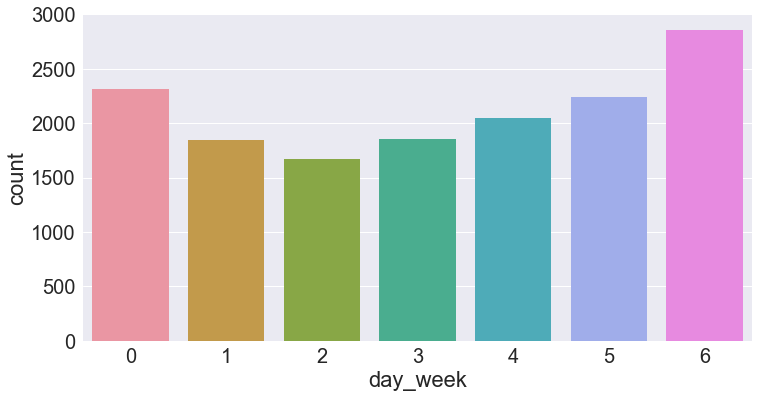

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x="day_week",data=df)

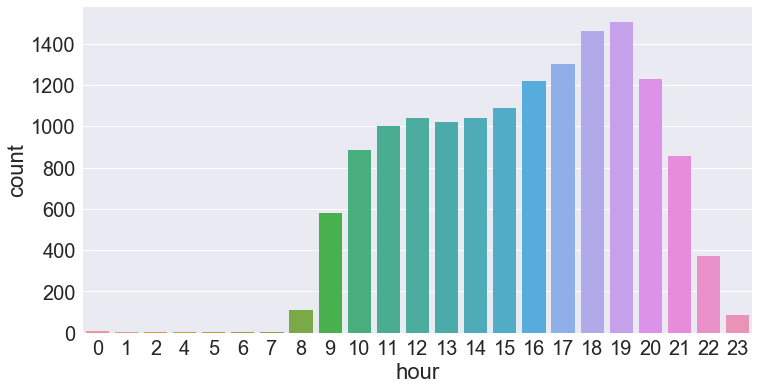

In [184]:
plt.figure(figsize=(12, 6))
sns.countplot(x="hour",data=df)

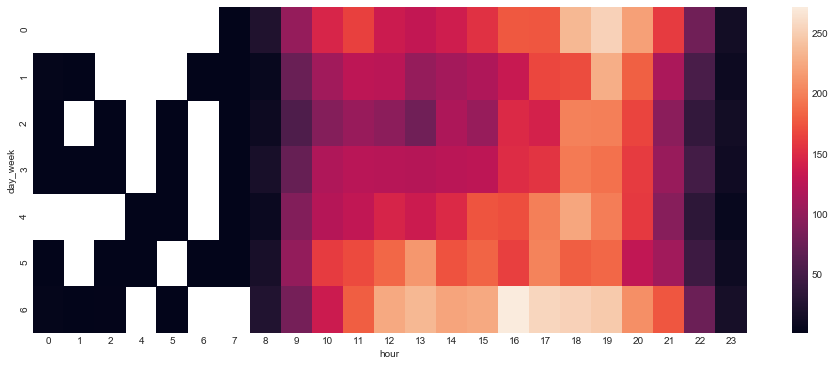

In [119]:
plt.figure(figsize=(16, 6))
grpby_hour_day=df.groupby(['day_week','hour'])['order id'].count().reset_index()
metric_grp_by =grpby_hour_day.pivot('day_week', 'hour', 'order id')
sns.heatmap(metric_grp_by)

### Frequency of placing/delivering orders are more on 1st of the month and then there after every 7-8 days after. If shows weekly buying pattern.
### There is higher frequency of order getting delivered on weekend then week day as expected.
###  Orders are delivered during day time from  9AM - 9PM and with most deliverys on sat-sun between 6pm-9pm in the evening. 

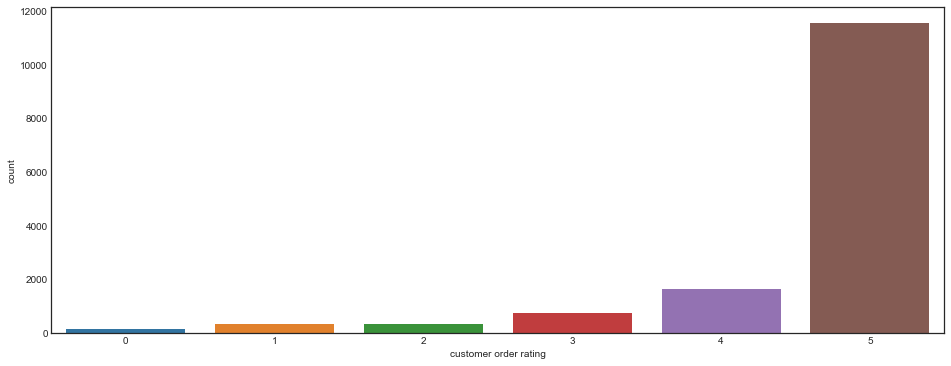

In [120]:
plt.figure(figsize=(16, 6))
sns.p(x="customer order rating",data=df)

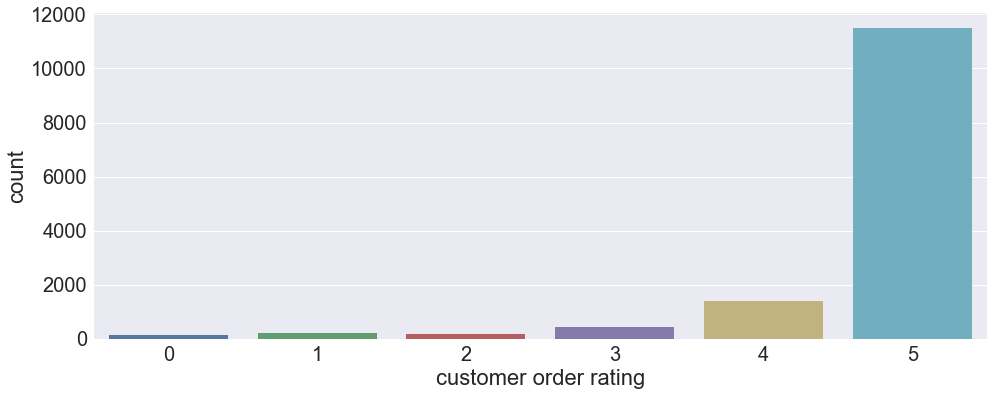

In [22]:
plt.figure(figsize=(16, 6))
data_with_issue = df[df["type of issue reported"].isna()]
sns.countplot(x="customer order rating",data=data_with_issue)

In [ ]:
### % 5 star ratings 

In [188]:
print(df["customer order rating"].value_counts())
(11591/14834)*100 

5    11591
4     1656
3      741
2      348
1      344
0      154
Name: customer order rating, dtype: int64


78.1380612107321

#### Most of the customers has given 5 start ratings. In order to improve business we need to concentrate on customers which has given low ratings

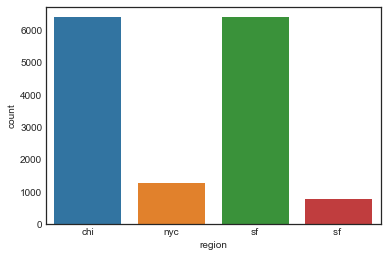

In [121]:

sns.countplot(x="region",data=df)


In [136]:
# removing white spaces
df["region"]= df["region"].apply(lambda x:x.strip())
df["region"].unique()

array(['chi', 'nyc', 'sf'], dtype=object)

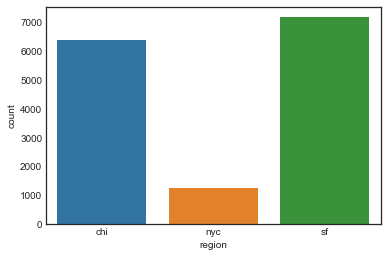

In [123]:
sns.countplot(x="region",data=df)

plt.figure(figsize=(12, 6))
grp_issue_type = df.groupby("type of issue reported",sort=True)["order id"].count().reset_index()
grp_issue_type.columns = ["type of issue reported","freq"]
g = sns.barplot(x="type of issue reported",y="freq" ,data= grp_issue_type.sort_values("freq") )

g.set_xticklabels(g.get_xticklabels(),rotation=45)

In [195]:
total = grp_issue_type["freq"].sum()
grp_issue_type["percentage"] = grp_issue_type["freq"].apply(lambda x : (x/total)*100)
grp_issue_type

,type of issue reported,freq,percentage
0,Damaged or spoiled,263,27.282158
1,Item charged incorrectly,20,2.074689
2,Item missing,161,16.701245
3,Other Order Issue,21,2.178423
4,Poor replacement,51,5.290456
5,Poor service,119,12.344398
6,Wrong item,329,34.128631


### most of the issue reported are becasue of wrong item, damaged or spoiled, item missing and poor service. Need imporvement in this area

#### Check data for correlation with each others

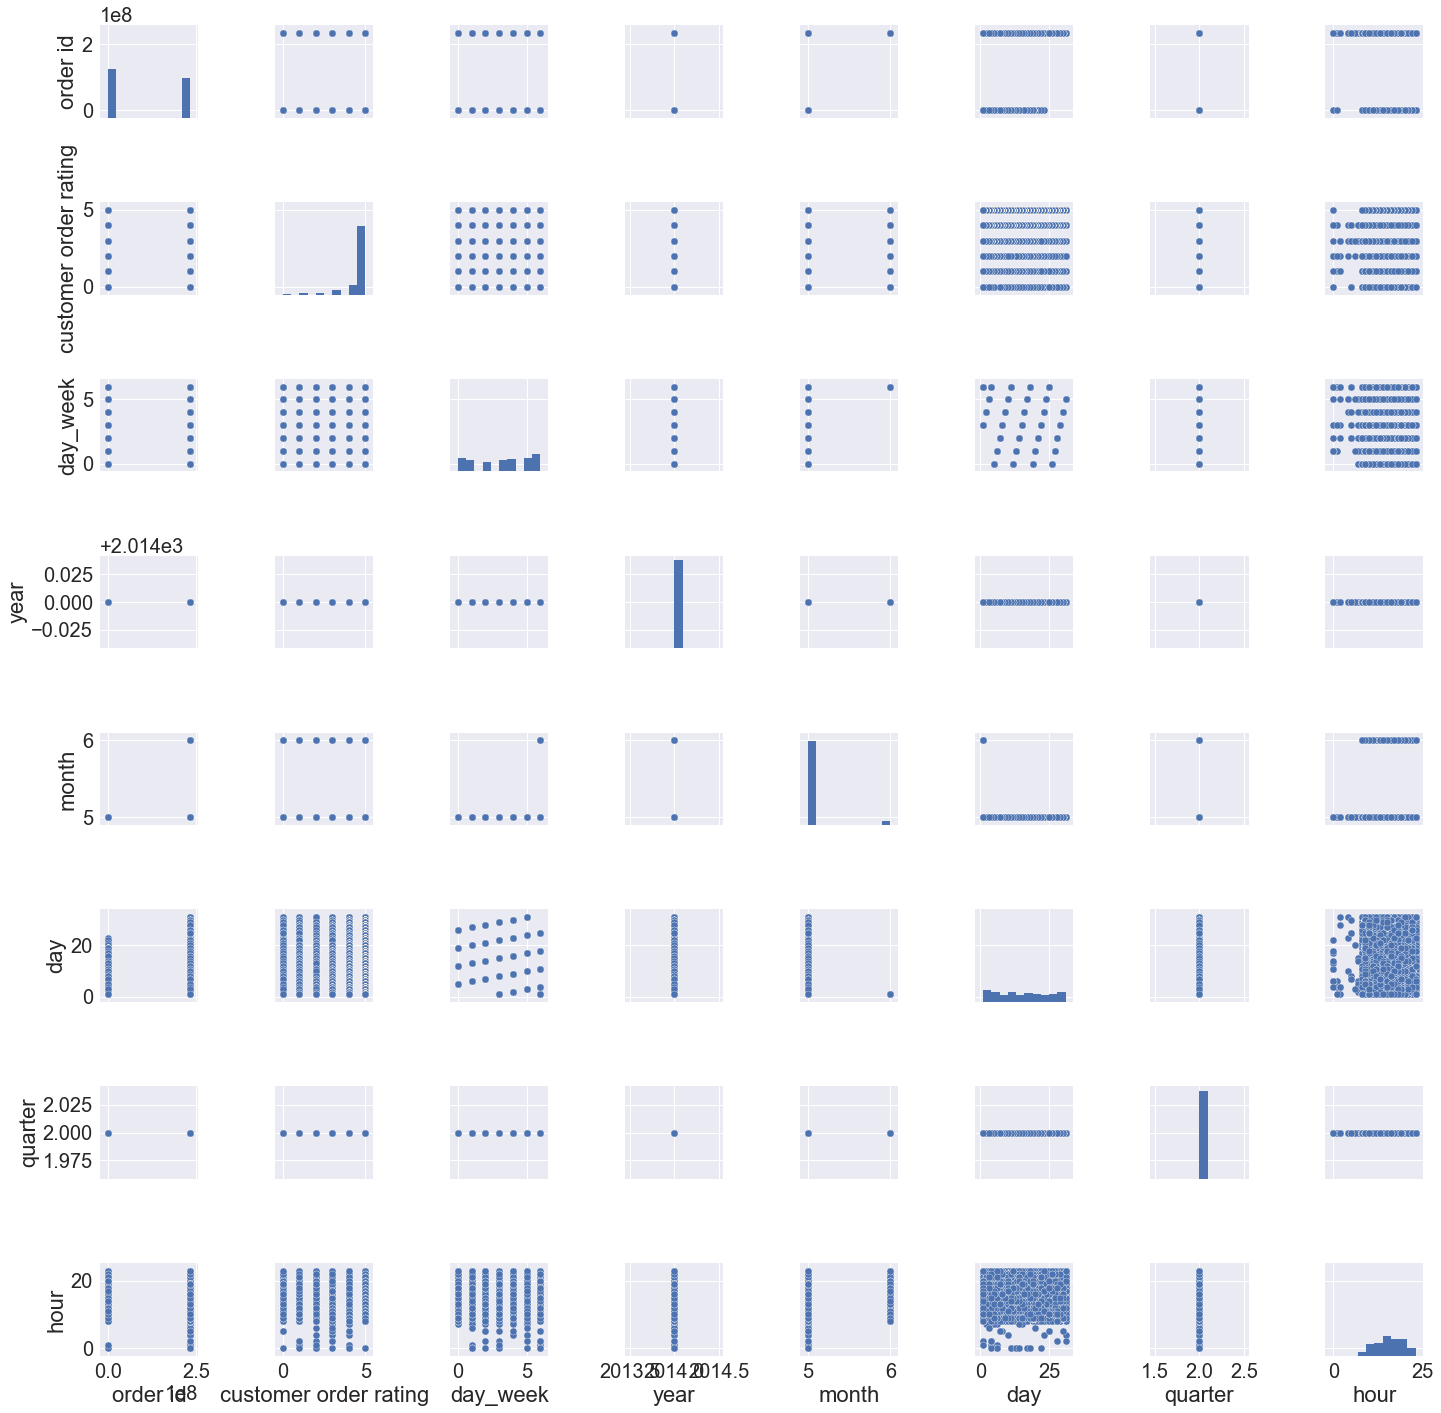

In [198]:
sns.pairplot(df)

## Bivarient Analysis

#### Issues reported region wise

[Text(0,0,'nyc'), Text(0,0,'chi'), Text(0,0,'sf')]

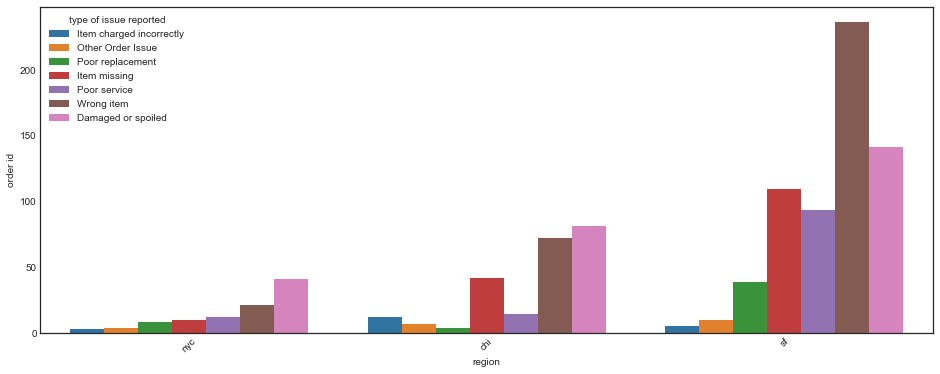

In [145]:
plt.figure(figsize=(16, 6))
grp_issue_region = df.groupby(["region","type of issue reported"])["order id"].count().reset_index()

iss = sns.barplot(hue="type of issue reported",y="order id",x="region",data=grp_issue_region.sort_values("order id"))
iss.set_xticklabels(iss.get_xticklabels(),rotation=45)

[Text(0,0,'0'),
 Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5')]

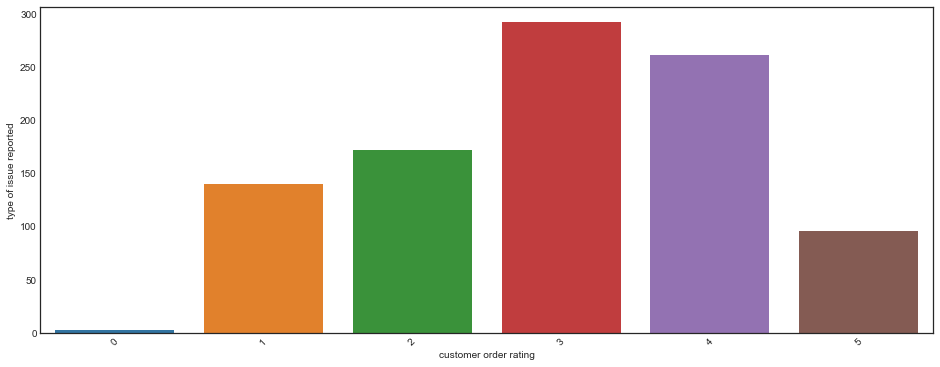

In [144]:
plt.figure(figsize=(16, 6))
grp_rating_issue = df.groupby(["customer order rating"])["type of issue reported"].count().reset_index()

issr = sns.barplot( y="type of issue reported",x="customer order rating",data=grp_rating_issue.sort_values("type of issue reported"))
issr.set_xticklabels(issr.get_xticklabels(),rotation=45)


#### If there was issue reported generally that order gets rating between 1-4

[Text(0,0,'0'),
 Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5')]

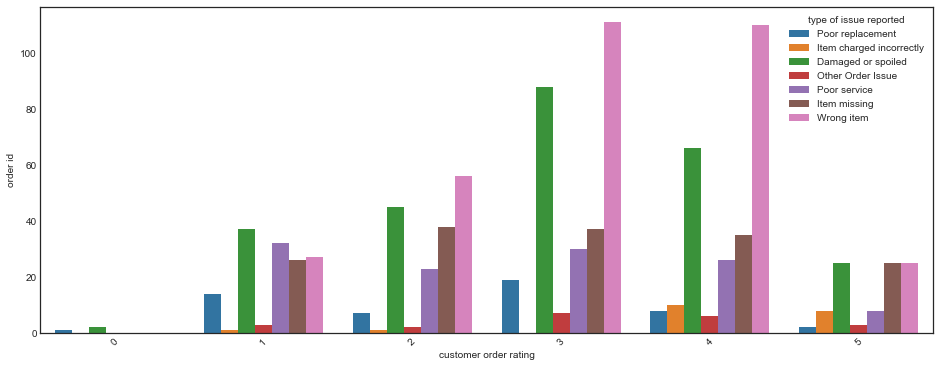

In [141]:
## relation between issue and ratings
plt.figure(figsize=(16, 6))
grp_rating_issue = df.groupby(["customer order rating","type of issue reported"])["order id"].count().reset_index()

issr = sns.barplot( hue="type of issue reported",y="order id",x="customer order rating",data=grp_rating_issue.sort_values("order id"))
issr.set_xticklabels(issr.get_xticklabels(),rotation=45)


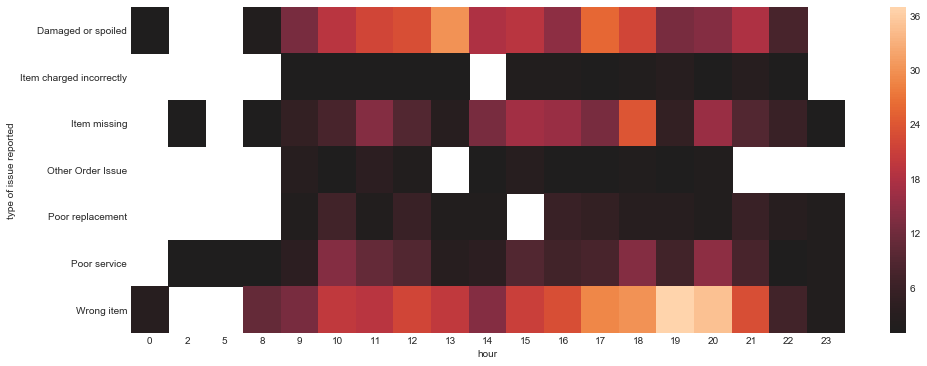

In [156]:
plt.figure(figsize=(16, 6))
grpby_hour_issue=df.groupby(['type of issue reported','hour'])['order id'].count().reset_index()
metric_grp_by_issue =grpby_hour_issue.pivot('type of issue reported', 'hour', 'order id')


sns.heatmap(metric_grp_by_issue,center=True)

In [ ]:
### no clear correlation between time of day/ date and issue reported.

In [163]:
grp_orderid_issue = df.groupby(['order id'])['type of issue reported'].count().reset_index()
grp_orderid_issue[grp_orderid_issue['type of issue reported']>0]["order id"]

,order id,type of issue reported
66,220476,1
81,220553,1
104,220637,2
109,220658,1
121,220711,1
148,220806,2
179,220968,1
213,221096,1
245,221220,1
316,221502,1


In [197]:
### Issue reported percentage
886/13845*100

6.399422174070062

In [179]:
grp_orderid = df.groupby(['order id']).count().reset_index()
grp_orderid = grp_orderid[grp_orderid["region"]>1]
df.loc[df["order id"].isin(grp_orderid["order id"]) & df["type of issue reported"].notna()].sort_values(["order id","order delivery date","order delivery time"])

,order delivery time,order id,customer order rating,type of issue reported,region,order delivery date,day_week,year,month,day,quarter,hour
13991,10:45:57,220637,2,Poor service,sf,2014-05-01,3,2014,5,1,2,10
13992,10:45:57,220637,2,Wrong item,sf,2014-05-01,3,2014,5,1,2,10
14112,11:51:01,220806,1,Damaged or spoiled,sf,2014-05-01,3,2014,5,1,2,11
14114,11:51:01,220806,1,Poor service,sf,2014-05-01,3,2014,5,1,2,11
13613,17:53:06,222476,4,Wrong item,sf,2014-05-02,4,2014,5,2,2,17
13612,18:08:43,222476,4,Wrong item,sf,2014-05-02,4,2014,5,2,2,18
6287,20:15:58,222599,2,Item missing,chi,2014-05-02,4,2014,5,2,2,20
12774,19:13:14,222626,5,Poor replacement,sf,2014-05-02,4,2014,5,2,2,19
13871,18:57:17,222941,3,Damaged or spoiled,sf,2014-05-02,4,2014,5,2,2,18
13872,18:57:17,222941,3,Wrong item,sf,2014-05-02,4,2014,5,2,2,18
